In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

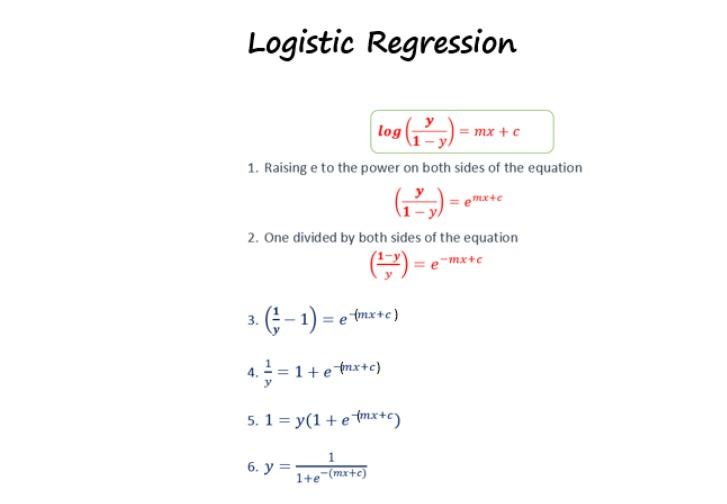

In [41]:
from IPython.display import Image
Image('log.jpg')

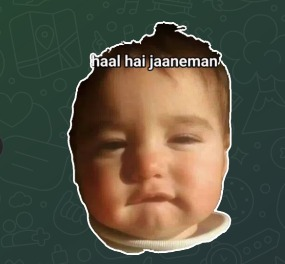

In [42]:
from IPython.display import Image
Image('lol.jpg')

In [43]:
df = pd.read_excel('shoe.xlsx')

In [44]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


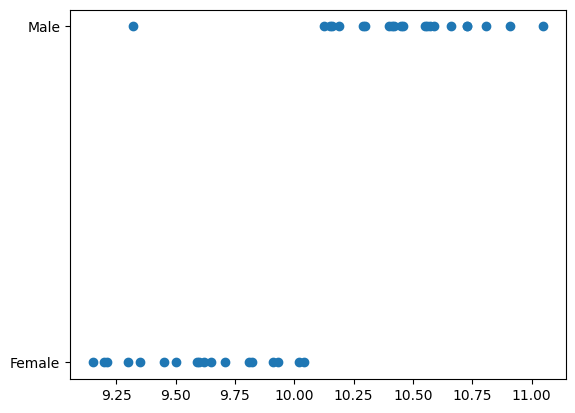

In [45]:
plt.scatter(df['size(cm)'],df['class(y)'])

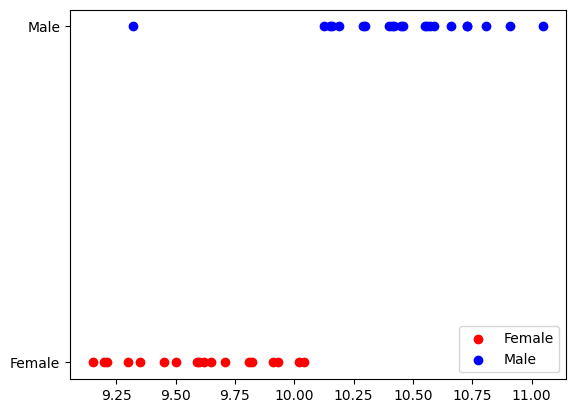

In [48]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')

plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')

plt.legend()

# Preprocessing

In [7]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=55)

In [11]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [12]:
ytrain.head()

31    0
25    1
36    0
14    1
16    0
Name: class(y), dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
reg = LogisticRegression()

In [16]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
m = reg.coef_

In [18]:
m

array([[2.10745564]])

In [19]:
c = reg.intercept_
c

array([-20.81422921])

In [20]:
pred = reg.predict(xtest)

In [21]:
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [22]:
reg.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [23]:
ytest.head()

22    0
3     0
2     1
38    0
6     0
Name: class(y), dtype: int64

In [24]:
Log_score = reg.score(xtest,ytest)
Log_score

0.9166666666666666

In [25]:
mae1 = mean_absolute_error(ytest,pred)
mae1

0.08333333333333333

In [26]:
mse1 = mean_squared_error(ytest,pred)
mse1

0.08333333333333333

In [27]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],
         'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [28]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_mae,0.083333
1,Logistic_mse,0.083333
2,Logistic_accuracy,0.916667


In [29]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

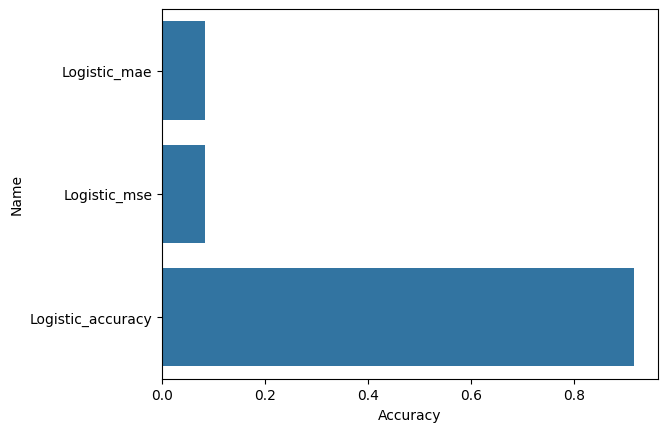

In [30]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)